In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
#Define path

img_path = 'C:\\Users\\roulB\\data_science\\cours\\00_intro\\img'

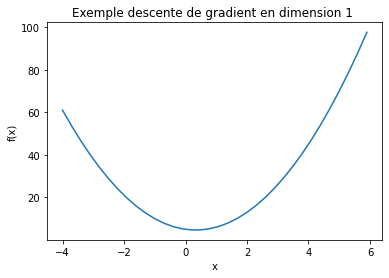

In [9]:
## Créer son propre gradient descent

#some value
x= np.arange(-4,6,0.3)

#function
y = 3*x**2 - 2*x +5
## derivative
y_d = 6*x-2

#constante

eta = 0.05
x0 = 5

# gradient descente

x_maj =[]
x_maj.append(x0)

#50 itération descente de gradient
for i in range(50):
    
    x_maj.append(x_maj[i]-eta*(6*(x_maj[i])-2)) 

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Exemple descente de gradient en dimension 1 ')
plt.savefig(os.path.join(img_path,'exemple_grad_1D_4.png'))


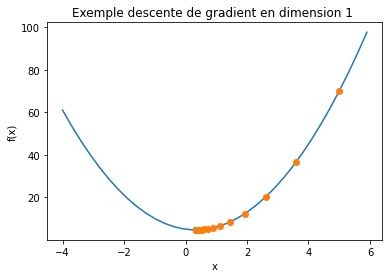

In [10]:
#Descente de gradient représentation
y_maj =  3*np.array(x_maj)**2 - 2*np.array(x_maj) +5

plt.plot(x, y)
plt.plot(x_maj , y_maj, 'o')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Descente de gradient pour x0 = 5 et eta = 0.05')
plt.title('Exemple descente de gradient en dimension 1 ')
plt.savefig(os.path.join(img_path,'descente_grad_exemple_5.png'))

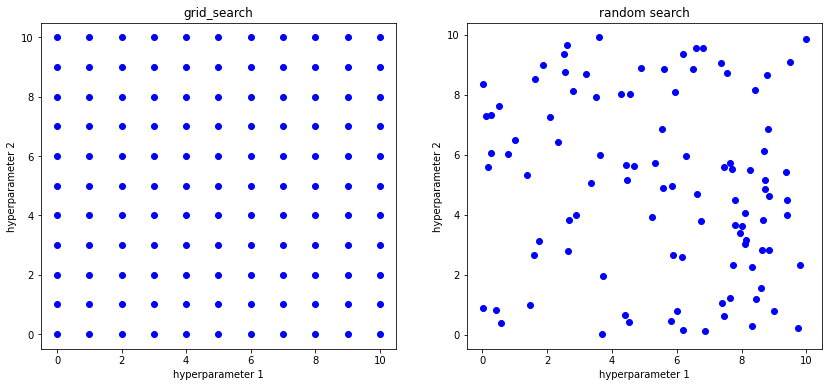

In [431]:
plt.figure(figsize=(14,6))
#grid search
plt.subplot(121)
grid_param_1 = np.repeat(np.arange(0,11),11)
grid_param_2 = np.tile(np.arange(0,11),11)

plt.scatter(grid_param_1 , grid_param_2, color='blue')
plt.title('grid_search')
plt.xlabel('hyperparameter 1')
plt.ylabel('hyperparameter 2')

#random search
plt.subplot(122)
random_param_1 = np.random.uniform(0,10,100)
random_param_2 = np.random.uniform(0,10,100)

plt.scatter(random_param_1, random_param_2, color ='blue')
plt.title('random search')
plt.xlabel('hyperparameter 1')
plt.ylabel('hyperparameter 2')
#Export
plt.savefig(os.path.join(img_path,'grid_search_6.png'))


In [447]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline

#Function sklearn qui genere données en forme de lune
X, y = make_moons(n_samples=1000, noise=0.15)

In [458]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    "max_samples": [0.2, 0.3, 0.4, 0.4, 0.1],
    "max_features": [1, 2],
    "max_depth": [ 4, 20,] 
}

# grid
reg_grid = GridSearchCV(RandomForestClassifier(),
                        param_grid=param_grid,
                        cv=5,
                        n_jobs=4, 
                        scoring='accuracy'
                       )

model_grid = reg_grid.fit(X, y)

model_grid.best_estimator_

In [522]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import uniform, randint


#Define grid
param_grid = {
    "max_samples": uniform(1e-2, 0.5),
    "max_features": randint(1,2),
    "max_depth": randint(4, 400) 
}

# Random
reg_rand = RandomizedSearchCV(RandomForestClassifier(),
                         param_distributions=param_grid,
                         cv=5,
                         n_jobs=4,
                         scoring='accuracy',
                         random_state=42)
#Fit model
model_rand = reg_rand.fit(X, y)

#Print best estimator
print(model_rand.best_estimator_)

RandomForestClassifier(max_depth=106, max_features=1,
                       max_samples=0.40827149343011643)


In [528]:
#! pip install scikit-optimize
from skopt import BayesSearchCV
# parameter ranges are specified by one of below
from skopt.space import Real, Categorical, Integer
#Real : Nombre réel
#Categorial : data catégoriel, exemple 'bleu', 'rouge'
#Integer : ...

#Define grid
param_grid = {
    "max_samples": Real(1e-2, 0.5),
    "max_features": Integer(1,2),
    "max_depth": Integer(4, 400) 
}
#grid
reg_bay = BayesSearchCV(estimator=RandomForestClassifier(),
                    search_spaces=param_grid,
                    cv=5,
                    n_jobs=8,
                    scoring='accuracy',
                    random_state=42)
#Fit the data
model_bay = reg_bay.fit(X, y)
#Meilleur estimateur
print(model_bay.best_estimator_)

[[ 0.19802951 -0.11806389]
 [-1.58423607  1.66601261]
 [ 0.19802951 -0.85268362]
 [ 1.18817705 -0.6952651 ]]


array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])